### import MAGEMin from julia using juliacall

In [1]:
import juliacall
import numpy as np

MAGEMin_C = juliacall.newmodule("MAGEMin_C")
MAGEMin_C.seval("using MAGEMin_C")

from juliacall import Main as jl, convert as jlconvert

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Using libMAGEMin.dylib from MAGEMin_jll


In [2]:
import PyMAGEMin

In [3]:
### Find the solidus and liquidus when P = 8 kbar

In [4]:
db   = "ig"  # database: ig, igneous (Holland et al., 2018) mp, metapelite (White et al 2014b)
data = MAGEMin_C.Initialize_MAGEMin(db, verbose=False)
test = 0         #KLB1
data = MAGEMin_C.use_predefined_bulk_rock(data, test)
P    = 8.0
# out  = MAGEMin_C.point_wise_minimization(P,T, data)

#### Determine the liquid fraction of bulk rock to get solidus and liquidus


In [5]:
liq_frac_vals = []
temp = np.linspace(1000, 2000, 1001)
for T in temp:
    out = MAGEMin_C.single_point_minimization(P, T, data)
    liq_frac = PyMAGEMin.MAGEMin_functions.phase_frac(phase="liq", MAGEMinOutput=out, sys_in='mol')
    liq_frac_vals.append( liq_frac )

In [6]:
### find where liquidus first becomes 1 (liquidus)
liquidus_T = temp[np.where(np.array(liq_frac_vals) == 1.0)[0][0]]
### find where liquidus is 0 for last time (solidus)
solidus_T  = temp[np.where(np.array(liq_frac_vals) == 0.0)[0][-1]]

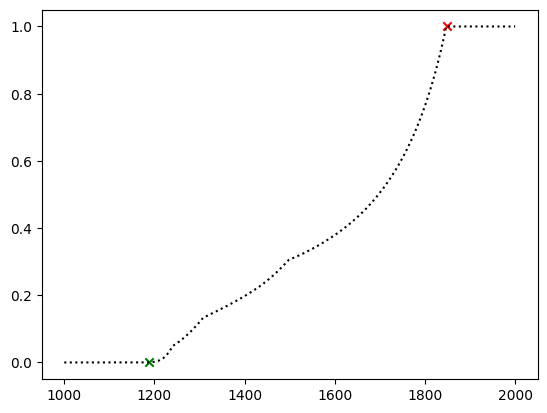

In [7]:
import matplotlib.pyplot as plt


plt.plot(temp,  liq_frac_vals , c='k', ls=':')
plt.scatter(liquidus_T, 1, marker='x', c='red')
plt.scatter(solidus_T, 0, marker='x', c='green')

In [8]:
print(f'solidus = {solidus_T}°C, liquidus = {liquidus_T}°C')

solidus = 1188.0°C, liquidus = 1848.0°C


### Find solidus and liquidus to nearest degree

In [9]:
initial_T = 1200.
solidus_T = float( initial_T )
out = MAGEMin_C.single_point_minimization(P, liquidus_T, data)
liq_frac = PyMAGEMin.MAGEMin_functions.phase_frac(phase="liq", MAGEMinOutput=out, sys_in='mol')

while liq_frac > 0:
    solidus_T -= 1.
    out = MAGEMin_C.single_point_minimization(P, solidus_T, data)
    liq_frac = PyMAGEMin.MAGEMin_functions.phase_frac(phase="liq", MAGEMinOutput=out, sys_in='mol')
    print(liq_frac, solidus_T)

0.001836698008123093 1199.0
0.0015973205888102683 1198.0
0.0013780769351836462 1197.0
0.0011738214563491195 1196.0
0.0009882690189167752 1195.0
0.0007971076188534354 1194.0
0.0006297660269190425 1193.0
0.00045677712677245517 1192.0
0.0002945426148541775 1191.0
0.00015350956611932852 1190.0
1.760917779710022e-05 1189.0
0.0 1188.0


In [10]:
initial_T = 1800.
liquidus_T = float( initial_T )
out = MAGEMin_C.single_point_minimization(P, liquidus_T, data)
liq_frac = PyMAGEMin.MAGEMin_functions.phase_frac(phase="liq", MAGEMinOutput=out, sys_in='mol')

while liq_frac < 1:
    liquidus_T += 1.
    out = MAGEMin_C.single_point_minimization(P, liquidus_T, data)
    liq_frac = PyMAGEMin.MAGEMin_functions.phase_frac(phase="liq", MAGEMinOutput=out, sys_in='mol')
    print(liq_frac, liquidus_T)

0.7678077177808588 1801.0
0.7717560749147305 1802.0
0.775688266963355 1803.0
0.7797189135063312 1804.0
0.7837396878169002 1805.0
0.7877869768037459 1806.0
0.7919387430812226 1807.0
0.7961276766714983 1808.0
0.800298318076304 1809.0
0.8045839667185712 1810.0
0.8088357599442539 1811.0
0.81322298982022 1812.0
0.8175790281115132 1813.0
0.8219945963673208 1814.0
0.8265151212144082 1815.0
0.8310224505674317 1816.0
0.8355777814686325 1817.0
0.8401879053583674 1818.0
0.844850640620775 1819.0
0.849563107491105 1820.0
0.8543798111712074 1821.0
0.8591844534309179 1822.0
0.8640384674617974 1823.0
0.8689871668113931 1824.0
0.8739285272540835 1825.0
0.8789367649456359 1826.0
0.8841093342210921 1827.0
0.8892184724075176 1828.0
0.8944323679102022 1829.0
0.8996919202187227 1830.0
0.9050516162107528 1831.0
0.9104480108564915 1832.0
0.9158797940665021 1833.0
0.9214202212014857 1834.0
0.9270086458535228 1835.0
0.932741824440536 1836.0
0.9385357869012477 1837.0
0.9443728464177916 1838.0
0.9502316372029807 

In [11]:
print(f'solidus = {solidus_T}°C, liquidus = {liquidus_T}°C')

solidus = 1188.0°C, liquidus = 1848.0°C


### These have been wrapped into functions within the package

In [14]:
initial_solidus_T = 1200.0  
initial_liquidus_T = 1800.0 

solidus_T = PyMAGEMin.MAGEMin_functions.find_solidus(P, initial_solidus_T, data, precision=1.0)
print(f"Determined Solidus Temperature: {solidus_T:.2f} °C")

liquidus_T = PyMAGEMin.MAGEMin_functions.find_liquidus(P, initial_liquidus_T, data, precision=1.0)
print(f"Determined Liquidus Temperature: {liquidus_T:.2f} °C")

Determined Solidus Temperature: 1188.00 °C
Determined Liquidus Temperature: 1848.00 °C


In [15]:
print(f'solidus = {solidus_T}°C, liquidus = {liquidus_T}°C')

solidus = 1188.0°C, liquidus = 1848.0°C
